In [9]:
import numpy as np
import matplotlib.pyplot as pl

Code adapted from [https://allofyourbases.com/2017/08/21/gaussian-processes-in-python/](https://allofyourbases.com/2017/08/21/gaussian-processes-in-python/)

In [14]:
def cov_kernel(x1,x2,h,lam):
 
    """
    Squared-Exponential covariance kernel
    """
 
    k12 = h**2*np.exp(-1.*(x1 - x2)**2/lam**2)
    return k12

- On the diagonal K = h^2
- Lambda functions like a std. dev.

In [11]:
def make_K(x, h, lam):
 
    """
    Make covariance matrix from covariance kernel
    """
 
    # for a data array of length x, make a covariance matrix x*x:
    K = np.zeros((len(x),len(x)))
 
    for i in range(0,len(x)):
        for j in range(0,len(x)):
 
            # calculate value of K for each separation:
            K[i,j] = cov_kernel(x[i],x[j],h,lam)
    
    return K

<ipython-input-13-f81e8870ab6c>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  pl.subplot(int(tmp2))
<ipython-input-13-f81e8870ab6c>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  pl.subplot(int(tmp2))
<ipython-input-13-f81e8870ab6c>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created 

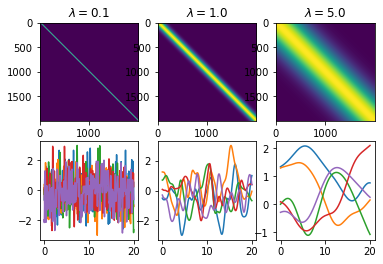

In [13]:
# make an array of 200 evenly spaced positions between 0 and 20:
x = np.arange(0, 20.,0.01)
 
for i in range(0,3):
 
    h = 1.0
 
    if (i==0): lam = 0.1
    if (i==1): lam = 1.0
    if (i==2): lam = 5.0
 
    # make a covariance matrix:
    K = make_K(x,h,lam)
 
    # five realisations:
    for j in range(0,5):
 
        # draw samples from a co-variate Gaussian distribution, N(0,K):
        y = np.random.multivariate_normal(np.zeros(len(x)),K)
 
        tmp2 = '23'+str(i+3+1)
        pl.subplot(int(tmp2))
        pl.plot(x,y)
 
    tmp1 = '23'+str(i+1)
    pl.subplot(int(tmp1))
    pl.imshow(K)
    pl.title(r"$\lambda = $"+str(lam))

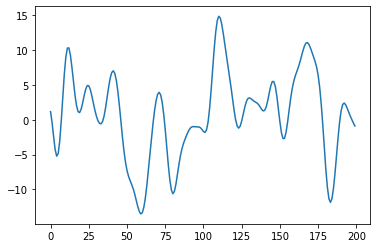

In [29]:
# make an array of 200 evenly spaced positions between 0 and 20:
x = np.arange(0, 200, 1)
  
h = 6.645
lam = 6.645

# make a covariance matrix:
K = make_K(x,h,lam)

# five realisations:
for j in range(0,1):

    # draw samples from a co-variate Gaussian distribution, N(0,K):
    y = np.random.multivariate_normal(np.zeros(len(x)),K)

    pl.plot(x,y)

In [19]:
K

array([[2.50000000e+001, 2.47512458e+001, 2.40197360e+001, ...,
        7.12187795e-168, 1.37129636e-169, 2.58810702e-171],
       [2.47512458e+001, 2.50000000e+001, 2.47512458e+001, ...,
        3.62553282e-166, 7.12187795e-168, 1.37129636e-169],
       [2.40197360e+001, 2.47512458e+001, 2.50000000e+001, ...,
        1.80910288e-164, 3.62553282e-166, 7.12187795e-168],
       ...,
       [7.12187795e-168, 3.62553282e-166, 1.80910288e-164, ...,
        2.50000000e+001, 2.47512458e+001, 2.40197360e+001],
       [1.37129636e-169, 7.12187795e-168, 3.62553282e-166, ...,
        2.47512458e+001, 2.50000000e+001, 2.47512458e+001],
       [2.58810702e-171, 1.37129636e-169, 7.12187795e-168, ...,
        2.40197360e+001, 2.47512458e+001, 2.50000000e+001]])